<a href="https://colab.research.google.com/github/aldodec/Covid19-Mex/blob/master/SIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import scipy.integrate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# ODEs

def SIR_model(y0,t,beta,gamma):

  S, I, R = y0

  dS_dt = -beta*S*I
  dI_dt = beta*S*I - gamma*I
  dR_dt = gamma*I

  return([dS_dt,dI_dt,dR_dt])

In [0]:
# Initial Conditions

S0 = 0.9
I0 = 0.1
R0 = 0.0
beta = 2.12
gamma = 0.1

t = np.linspace(0,100,1000)

solution = scipy.integrate.odeint(SIR_model,y0=[S0,I0,R0],t=t,args=(beta,gamma))
solution = np.array(solution)

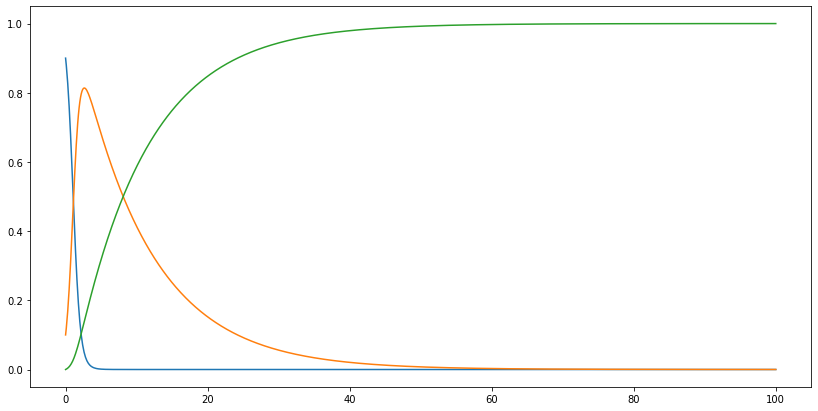

In [17]:
plt.figure(figsize=(14,7))
plt.plot(t,solution[:,0])
plt.plot(t,solution[:,1])
plt.plot(t,solution[:,2])
plt.show()

In [0]:
def SIR_model(y0,t,beta,gamma,N):

  S, I, R = y0

  dS_dt = -beta*S*I/N
  dI_dt = beta*S*I/N - gamma*I
  dR_dt = gamma*I

  return([dS_dt,dI_dt,dR_dt])

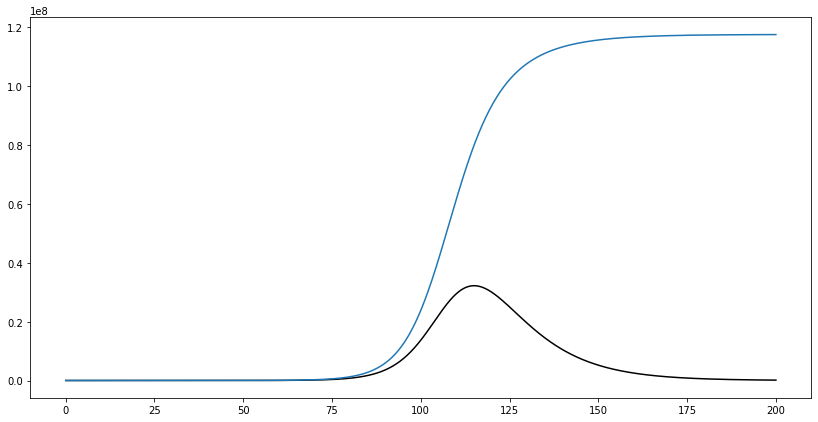

In [98]:
# Initial Conditions

N0 = 130 * 10**6
I0 = 2.17

S0 = N0 - I0
R0 = 1/N0
beta = 0.26
gamma = 0.1

t = np.linspace(0,200,1000)

solution = scipy.integrate.odeint(SIR_model,y0=[S0,I0,R0],t=t,args=(beta,gamma,N0))
solution = np.array(solution)
plt.figure(figsize=(14,7))
plt.plot(t,solution[:,1],color= 'black')
plt.plot(t,solution[:,2]+solution[:,1])
plt.show()

In [0]:
positives = [3,4,5,5,5,5,5,6,7,7,7,7,11,14,26,41,53,82,93,118,164,203,251,316
                   ,367,405,475,585,717,848,993,1094,1215,1378,1510,1688,1890,2143,
                   2439,2785,3181,3441,3844,4219,4661,5014,5399,5847,6297,6875,7497,
                   8261,8772,9501,10544,11633]
days = [i for i in range(len(positives))]

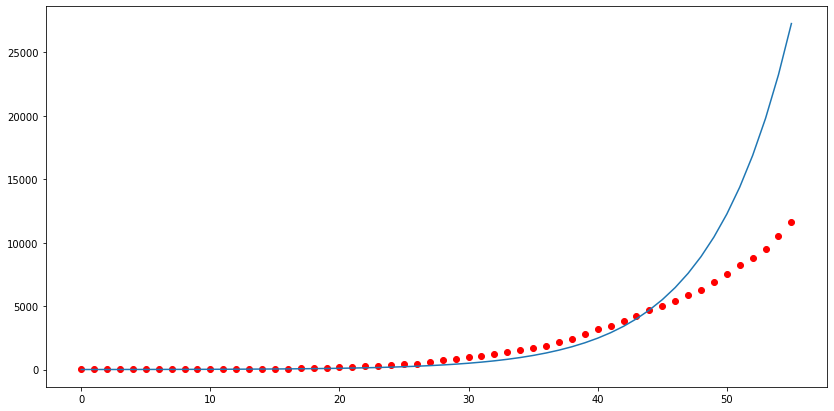

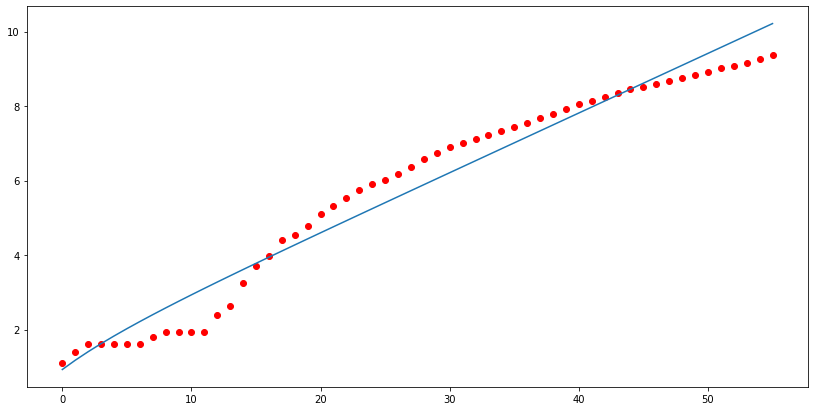

In [119]:
# Initial Conditions

N0 = 130 * 10**6
I0 = 2.53

S0 = N0 - I0
R0 = 1/N0
beta = 0.26
gamma = 0.1

t = np.linspace(0,len(positives)-1,len(positives))  
solution = scipy.integrate.odeint(SIR_model,y0=[S0,I0,R0],t=t,args=(beta,gamma,N0))
solution = np.array(solution)

plt.figure(figsize=(14,7))
plt.scatter(days,(positives),color='r')
plt.plot(t,(solution[:,2]+solution[:,1]))
plt.show()

plt.figure(figsize=(14,7))
plt.scatter(days,np.log(positives),color='r')
plt.plot(t,np.log(solution[:,2]+solution[:,1]))
plt.show()

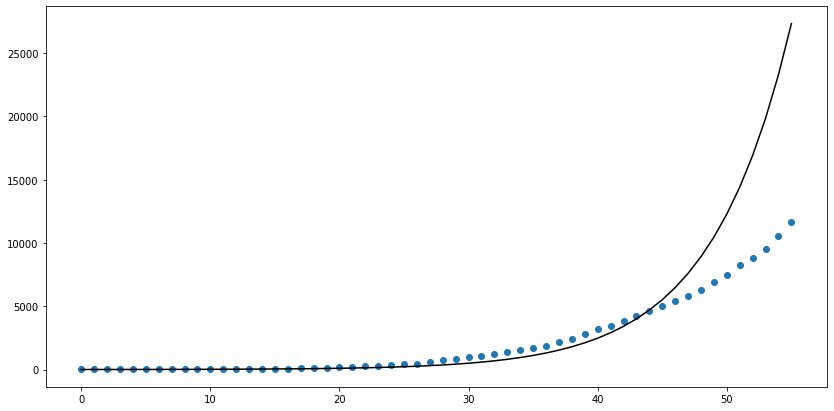

0.26 2.5353535353535355


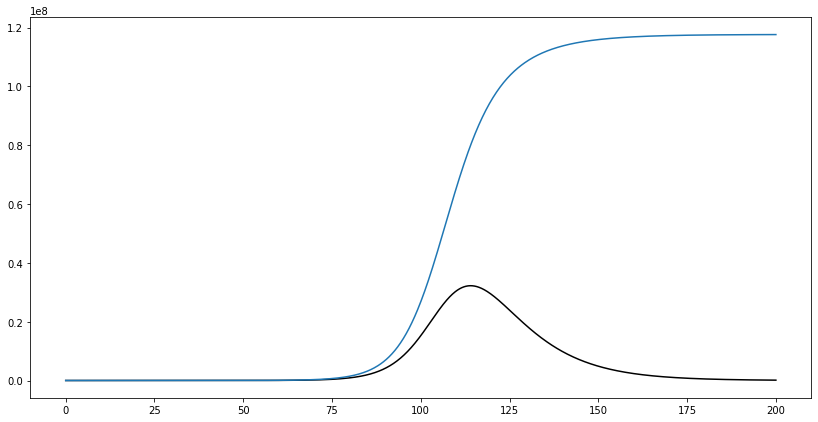

In [121]:
#beta = 0.26
#I0 = 2.17


N0 = 130 * 10**6
S0 = N0 - I0
R0 = 1/N0
gamma = 0.1
t = np.linspace(0,len(positives)-1,len(positives))  

loss_list = []
beta_list = []
I0_list = []

for beta in np.linspace(0.05,0.26,100):
  for I0 in np.linspace(1,3,100):
    solution = scipy.integrate.odeint(SIR_model,y0=[S0,I0,R0],t=t,args=(beta,gamma,N0))
    solution = np.array(solution)
    y_pred = solution[:,2]+solution[:,1]
    loss = np.sum((np.log(y_pred) - np.log(positives))**2)
    loss_list.append(loss)
    beta_list.append(beta)
    I0_list.append(I0)

Loss_df = pd.DataFrame({'loss':loss_list,'beta': beta_list,'I0':I0_list})
beta = Loss_df[Loss_df['loss'] == min(loss_list)]['beta'].values[0]
I0 = Loss_df[Loss_df['loss'] == min(loss_list)]['I0'].values[0]
t = np.linspace(0,len(positives)-1,len(positives))
solution = scipy.integrate.odeint(SIR_model,y0=[S0,I0,R0],t=t,args=(beta,gamma,N0))
solution = np.array(solution)  
plt.figure(figsize=(14,7))
#plt.plot(t,solution[:,1],color= 'black')
plt.plot(t,solution[:,2]+solution[:,1],color = 'black')
plt.scatter(days,positives)
plt.show()
print(beta,I0)

T = np.linspace(0,200,1000)
solution = scipy.integrate.odeint(SIR_model,y0=[S0,I0,R0],t=T,args=(beta,gamma,N0))
solution = np.array(solution)
plt.figure(figsize=(14,7))
plt.plot(T,solution[:,1],color= 'black')
plt.plot(T,solution[:,2]+solution[:,1])
plt.show()

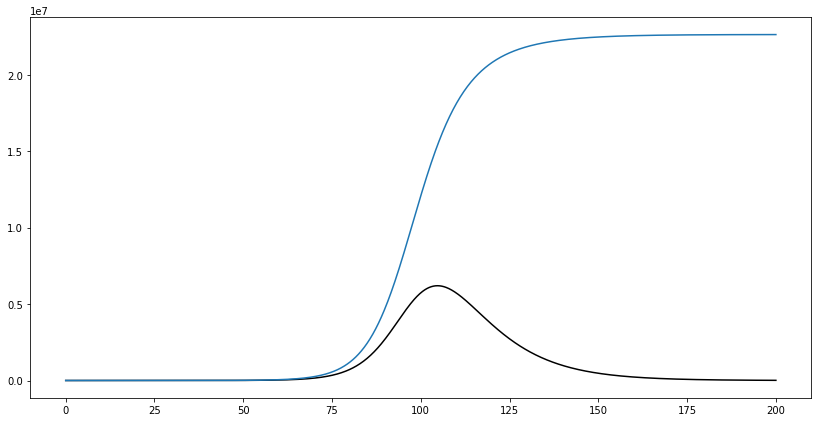

In [124]:
N0 = 25 * 10**6
I0 = 2.17

S0 = N0 - I0
R0 = 1/N0
beta = 0.26
gamma = 0.1

t = np.linspace(0,200,1000)

solution = scipy.integrate.odeint(SIR_model,y0=[S0,I0,R0],t=t,args=(beta,gamma,N0))
solution = np.array(solution)
plt.figure(figsize=(14,7))
plt.plot(t,solution[:,1],color= 'black')
plt.plot(t,solution[:,2]+solution[:,1])
plt.show()

In [126]:
beta/gamma

2.6